In [1]:
from sklearn.svm import OneClassSVM
import numpy as np
import warnings
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import sys
sys.path.append('../induction_motor_anomaly_detection/')
import modules,scaler

In [2]:
normal_data = pd.read_csv('../data/combined_data.csv')
anomalous_data = pd.read_csv('../anomalous_data/combined_anomalous.csv')


In [3]:
train_data_features = modules.ElectricalFeatureExtractor(current_data=normal_data)
test_data_features = modules.ElectricalFeatureExtractor(current_data=anomalous_data)
train_scaler = scaler.Scaler()
train_scaler.fit_unlabelled_data(train_data_features.feature_dataframe[0])
train_scaled = train_scaler.transform(train_data_features.feature_dataframe[0])
test_scaled = train_scaler.transform(test_data_features.feature_dataframe[0])

In [13]:

class AnomalyDetector:
    def __init__(self, kernel='rbf', nu=0.1, gamma='auto', window_size=1000, concat = True):
        self.kernel = kernel
        self.nu = nu
        self.gamma = gamma
        self.window_size = window_size
        self.clf = None
        self.X_train = np.array([])
        self.concat = concat

    def fit(self, X):
        """
        Fit the OneClassSVM to the training data.
        """
        if self.clf is None:
            self.clf = OneClassSVM(kernel=self.kernel, nu=self.nu, gamma=self.gamma)
            self.X_train = X
            self.clf.fit(X)
        else:
            self.X_train = np.concatenate((self.X_train, X), axis=0)
            # self.clf.fit(self.X_train[-self.window_size:])
            if self.concat :
                self.clf.fit(self.X)
            else:
                self.clf.fit(X)
                
    def predict(self, X_test):
        """
        Predict whether the data is anomalous or not based on the OneClassSVM.
        """
        is_anomaly = self.clf.predict(X_test) == -1
        return is_anomaly


In [7]:
anomaly_detector = AnomalyDetector(kernel='rbf', nu=0.1, gamma='auto', window_size=1000)

it = iter(train_scaled)
try:
    while True:
        data = next(it)
        anomaly_detector.fit([data])
except StopIteration:
    pass


In [8]:
anomaly_predictions = anomaly_detector.predict(train_scaled)

In [11]:
np.where(anomaly_predictions == True)[0]

array([ 12, 164, 175, 180, 197, 198, 202, 203, 204, 205, 206, 209, 211,
       212, 213, 215, 217, 220, 224, 228, 229, 230, 231, 232, 234, 235,
       239, 240, 242, 255, 271, 307], dtype=int64)

In [12]:
anomaly_detector.predict(test_scaled)

array([ True])

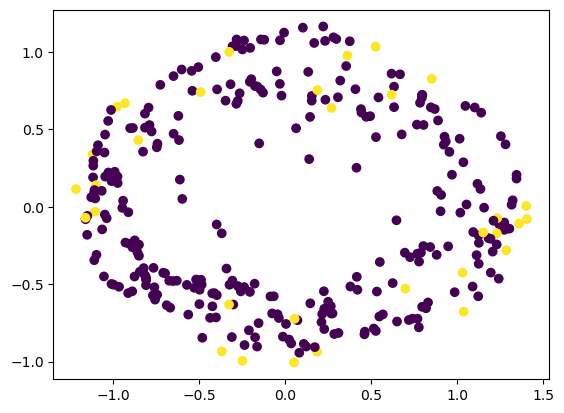

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# assuming you have already scaled and preprocessed the data and stored it in variable X

pca = PCA(n_components=2)
X_2d = pca.fit_transform(train_scaled)

# assuming you have already fit the anomaly detection model and stored it in variable anomaly_detector
anomaly_predictions = anomaly_detector.predict(train_scaled)

# scatter plot of the data points colored by anomaly label
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=anomaly_predictions)
plt.show()


In [1]:
from sklearn.svm import OneClassSVM
import numpy as np
import warnings
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import sys
sys.path.append('../induction_motor_anomaly_detection/')
import modules,scaler

In [2]:
normal_data = pd.read_csv('../data/combined_data.csv')
anomalous_data = pd.read_csv('../anomalous_data/combined_anomalous.csv')


In [3]:
train_scaler = scaler.Scaler()
train_scaler.fit_unlabelled_data(normal_data)

using MinMaxScaler()


In [4]:
train_scaled = train_scaler.transform(normal_data)
anomalous_scaled = train_scaler.transform(anomalous_data)

In [14]:
anomaly_detector = AnomalyDetector(kernel='rbf', nu=0.1, gamma='auto', window_size=1000, concat= False)
# from tqdm import tqdm

# for i in tqdm(range(0,len(train_scaled),10000)):
#     anomaly_detector.fit(train_scaled[i:i+10000])

In [15]:
anomaly_detector.fit(train_scaled[0:10000])

In [16]:
anomaly_predictions = anomaly_detector.predict(train_scaled[0:10000])




In [17]:
len(np.where(anomaly_predictions == True)[0])

999

In [20]:
X = train_scaled[0:10000]

In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
import plotly.graph_objects as go

# # Generate some fake data.
# n_samples = 200
# X = np.random.randn(n_samples, 3)

# # Fit the data with a one-class SVM
# svm = OneClassSVM(kernel='rbf', nu=0.1)
# svm.fit(X)

# Define a meshgrid to plot the decision boundary
xx, yy, zz = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100),
                         np.linspace(X[:, 2].min()-1, X[:, 2].max()+1, 100))
Z = anomaly_detector.clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Define the Plotly figure
fig = go.Figure(data=[
    go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers', marker=dict(
        color=np.where(anomaly_detector.clf.predict(X) == 1, 'blue', 'red'), size=5, opacity=0.8)),
    go.Surface(x=xx, y=yy, z=zz, surfacecolor=Z, colorscale='Viridis', showscale=False, opacity=0.9)
])

# Set the layout of the figure
fig.update_layout(scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z'),
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.8, y=-0.1, z=0.5), up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0))
    ))

# Show the figure
fig.show()


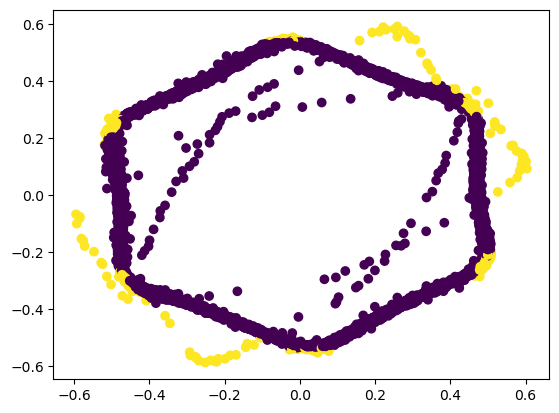

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# assuming you have already scaled and preprocessed the data and stored it in variable X

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# assuming you have already fit the anomaly detection model and stored it in variable anomaly_detector
anomaly_predictions = anomaly_detector.predict(X)

# scatter plot of the data points colored by anomaly label
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=anomaly_predictions)
plt.show()

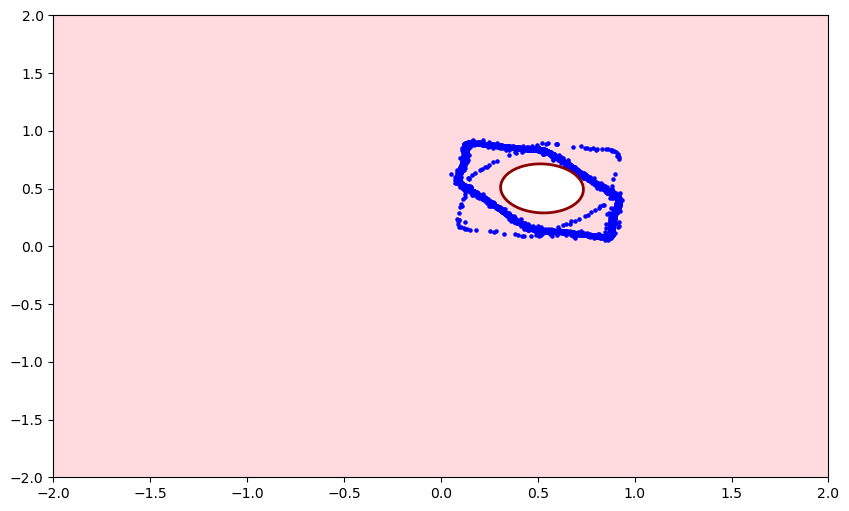

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Plot the decision boundary and the data points
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = anomaly_detector.clf.decision_function(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0]), dtype=float)])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10, 6))
ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
ax.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], colors=['lightpink', 'white'], alpha=0.5)
ax.scatter(X[:, 0], X[:, 1], s=5, color='blue')
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
plt.show()
